<a href="https://colab.research.google.com/github/Maypulido/colab/blob/main/Prueba_Xpecta_DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset prueba HV (1).csv to Dataset prueba HV (1).csv


In [ ]:
df = pd.read_csv("Dataset prueba HV (1).csv", sep= ";")

In [ ]:
print(df.head())

   ﻿Codigo  IDSalesForce  IDPredioControlG        PuntoEnvioID      Fecha  \
0    80114        947681             75355  0014y00002ZLneQAAT  1/05/2022   
1    80115        947683             51364  0018X000034zBpHQAU  1/05/2022   
2    80115        947683             51364  0018X000034zBpHQAU  1/05/2022   
3    80116        947684             33516  0014y00002GmXDnAAN  1/05/2022   
4    80117        947685             33516  0014y00002JLHPrAAP  1/05/2022   

  FormaPago  TipoCilindro  PrecioCilindro  Subsidio  Descuento   Total  \
0   CONTADO   CL DE 45 KG          170000         0          0  170000   
1   CONTADO   CL DE 15 KG               0         0          0       0   
2   CONTADO  CL  DE 18 KG               0         0          0       0   
3   CONTADO   CL DE 45 KG          153000         0          0  153000   
4   CONTADO  CL  DE 18 KG           84000         0          0   84000   

   Cantidad         ListaPrecio   Latitud   Longitud  Municipio  IdAliado  
0         1     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389 entries, 0 to 15388
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ﻿Codigo           15389 non-null  int64  
 1   IDSalesForce      15389 non-null  int64  
 2   IDPredioControlG  15389 non-null  int64  
 3   PuntoEnvioID      15282 non-null  object 
 4   Fecha             15389 non-null  object 
 5   FormaPago         15389 non-null  object 
 6   TipoCilindro      15389 non-null  object 
 7   PrecioCilindro    15389 non-null  int64  
 8   Subsidio          15389 non-null  int64  
 9   Descuento         15389 non-null  int64  
 10  Total             15389 non-null  int64  
 11  Cantidad          15389 non-null  int64  
 12  ListaPrecio       15389 non-null  object 
 13  Latitud           15389 non-null  float64
 14  Longitud          15389 non-null  float64
 15  Municipio         15389 non-null  object 
 16  IdAliado          15389 non-null  int64 

In [ ]:
print(df.describe())

            ﻿Codigo   IDSalesForce  IDPredioControlG  PrecioCilindro  \
count  15389.000000   15389.000000      15389.000000    15389.000000   
mean   86304.642927  957966.049256      65892.182208    65803.508480   
std     3549.865854    5743.062544      19339.067168    53424.215763   
min    80114.000000  947537.000000        482.000000    -1510.000000   
25%    83236.000000  953026.000000      54244.000000    10000.000000   
50%    86307.000000  957937.000000      69558.000000    67446.000000   
75%    89366.000000  963004.000000      81500.000000    79000.000000   
max    92437.000000  968789.000000      91464.000000   232000.000000   

       Subsidio  Descuento         Total      Cantidad       Latitud  \
count   15389.0    15389.0  1.538900e+04  15389.000000  15389.000000   
mean        0.0        0.0  3.280101e+05      8.317629      5.299489   
std         0.0        0.0  9.090404e+05     19.155557      2.458732   
min         0.0        0.0 -4.902000e+04      1.000000      0.4

In [ ]:
ventas_por_tipo_cilindro = df.groupby('TipoCilindro')['Total'].sum()

In [ ]:
ventas_por_tipo_cilindro

TipoCilindro
CL  DE 18 KG    2282784656
CL DE 10 KG         256883
CL DE 15 KG     1676757867
CL DE 35 KG         153000
CL DE 4.5 KG       4400644
CL DE 45 KG     1038509458
CL DE 9 KG        44885644
Name: Total, dtype: int64

In [ ]:
total_ventas = ventas_por_tipo_cilindro.sum()
porcentaje_ventas_por_tipo_cilindro = (ventas_por_tipo_cilindro / total_ventas) * 100

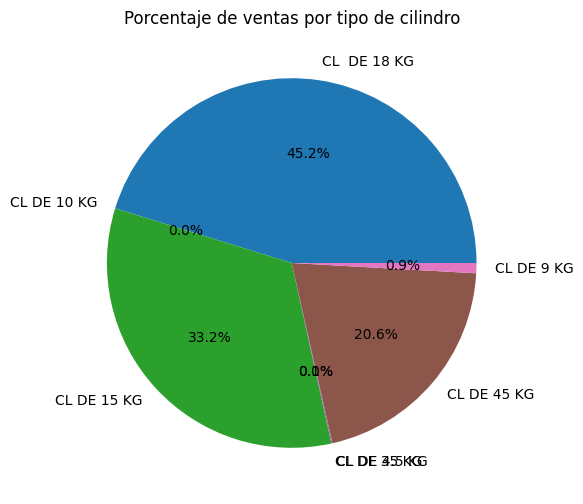

In [ ]:
plt.figure(figsize=(8, 6))
porcentaje_ventas_por_tipo_cilindro.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de ventas por tipo de cilindro')
plt.ylabel('')
plt.show()

In [ ]:
df_total_cero = df[df['Total'] == 0]
items_total_cero = df_total_cero.groupby('TipoCilindro')['Cantidad'].sum()
items_total = df.groupby('TipoCilindro')['Cantidad'].sum()
porcentaje_items_total_cero = (items_total_cero / items_total) * 100


In [ ]:
items_total_cero

TipoCilindro
CL  DE 18 KG    40479
CL DE 15 KG     17945
CL DE 35 KG         2
CL DE 4.5 KG      179
CL DE 45 KG      3741
CL DE 9 KG        357
Name: Cantidad, dtype: int64

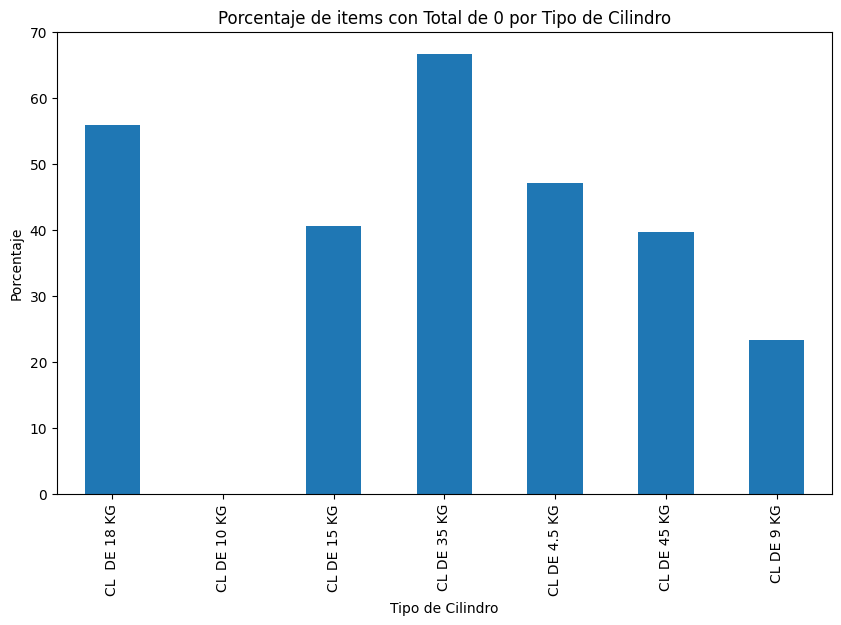

In [ ]:
plt.figure(figsize=(10, 6))
porcentaje_items_total_cero.plot(kind='bar')
plt.title('Porcentaje de items con Total de 0 por Tipo de Cilindro')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Cilindro')
plt.show()


In [ ]:
precio_por_municipio = df.groupby(['Municipio', 'TipoCilindro'])['PrecioCilindro'].mean().reset_index()

In [ ]:
print(precio_por_municipio)

     Municipio  TipoCilindro  PrecioCilindro
0    ABEJORRAL  CL  DE 18 KG         65000.0
1    ABEJORRAL   CL DE 15 KG         54800.0
2    ABEJORRAL   CL DE 45 KG        165500.0
3    AGUACHICA  CL  DE 18 KG             0.0
4    AGUACHICA   CL DE 15 KG             0.0
..         ...           ...             ...
653   ZARAGOZA  CL  DE 18 KG         68400.0
654   ZARAGOZA   CL DE 45 KG        169860.0
655     ZARZAL  CL  DE 18 KG             0.0
656  ZIPAQUIRA  CL  DE 18 KG             0.0
657  ZIPAQUIRA   CL DE 15 KG             0.0

[658 rows x 3 columns]


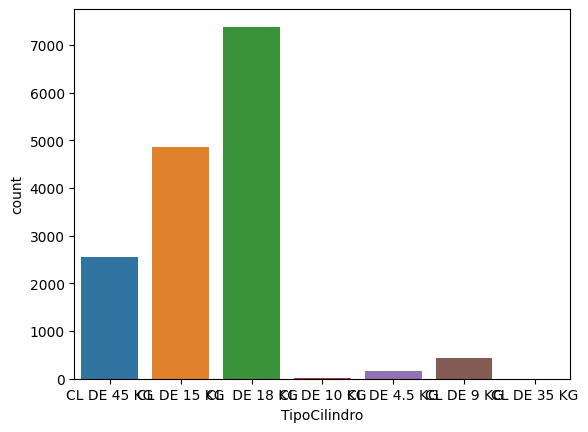

In [ ]:
sns.countplot(x='TipoCilindro', data=df)
plt.show()

In [ ]:
cilindros_bajo_precio = df[(df['PrecioCilindro'] < 1000) & (df['PrecioCilindro'] != 0)]

cilindros_bajo_precio = cilindros_bajo_precio[['TipoCilindro', 'Municipio','PrecioCilindro']]

print(cilindros_bajo_precio)



      TipoCilindro                Municipio  PrecioCilindro
2892   CL DE 15 KG                   SAMANA            -570
2893  CL  DE 18 KG                   SAMANA            -604
2894   CL DE 45 KG                   SAMANA           -1510
6489  CL  DE 18 KG  CALI (SANTIAGO DE CALI)               9
9096  CL  DE 18 KG  CALI (SANTIAGO DE CALI)              25


In [ ]:
ventas_por_lista = df.groupby('ListaPrecio').agg({'Cantidad': 'count', 'Total': 'sum'})
ventas_por_lista = ventas_por_lista.reset_index()
print(ventas_por_lista)

               ListaPrecio  Cantidad       Total
0                COMERCIAL       943   208287989
1  EXPENDIO/PUNTO DE VENTA      5521  3200491032
2                SUBALIADO       244   339504935
3       TRASLADOS/CONVENIO      4243   513368459
4            USUARIO FINAL      4438   786095737


In [ ]:
pago_por_tipo_cilindro = df.groupby(['TipoCilindro', 'FormaPago']).agg({'Cantidad': 'count', 'Total': 'sum'})
pago_por_tipo_cilindro = pago_por_tipo_cilindro.reset_index()
print(pago_por_tipo_cilindro)


    TipoCilindro         FormaPago  Cantidad       Total
0   CL  DE 18 KG           CONTADO      6279  2257475636
1   CL  DE 18 KG           CRÉDITO      1104    25232274
2   CL  DE 18 KG  CRÉDITO COMPAÑÍA         1       76746
3    CL DE 10 KG           CONTADO         8      256883
4    CL DE 15 KG           CONTADO      4593  1675960747
5    CL DE 15 KG           CRÉDITO       272      797120
6    CL DE 35 KG           CONTADO         3      153000
7   CL DE 4.5 KG           CONTADO       160     4400644
8    CL DE 45 KG           CONTADO      2476  1025576208
9    CL DE 45 KG           CRÉDITO        67    12933250
10   CL DE 45 KG  CRÉDITO COMPAÑÍA         1           0
11    CL DE 9 KG           CONTADO       423    44885644
12    CL DE 9 KG           CRÉDITO         2           0


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
ventas_por_dia = df.groupby(df['Fecha'].dt.date).agg({'Cantidad': 'sum', 'Total': 'sum'}).reset_index()
ventas_por_dia = ventas_por_dia.sort_values('Total', ascending=False)
print(ventas_por_dia)


         Fecha  Cantidad      Total
23  2022-05-31     10154  502503015
22  2022-05-30      5664  329523942
17  2022-05-25      5305  243248724
19  2022-05-27      7043  243147695
12  2022-05-20      5363  214005107
18  2022-05-26      5048  210206581
16  2022-05-24      4768  205503555
29  2022-11-05      5673  203838495
5   2022-05-13      5468  195792469
9   2022-05-17      4188  190436327
15  2022-05-23      5252  188787024
30  2022-12-05      4302  182334002
13  2022-05-21      4516  181202673
28  2022-10-05      4760  177002667
6   2022-05-14      4509  176241309
2   2022-03-05      5281  174999695
3   2022-04-05      4270  161179940
10  2022-05-18      4205  151137610
8   2022-05-16      4813  149624263
24  2022-06-05      3335  147802736
27  2022-09-05      4077  144630151
20  2022-05-28      4352  140277053
11  2022-05-19      3976  126521683
4   2022-05-05      3096   91587075
25  2022-07-05      2319   89278470
1   2022-02-05      2554   78165588
14  2022-05-22       689   4

In [ ]:
ventas_por_municipio = df.groupby('Municipio').agg({'Cantidad': 'sum', 'Total': 'sum'}).reset_index()
ventas_por_municipio = ventas_por_municipio.sort_values('Total', ascending=False)
print(ventas_por_municipio)

                                             Municipio  Cantidad      Total
20                                        BUENAVENTURA      6101  473338512
57                                              CUCUTA      3028  398243480
206                          SANTA FÉ DE BOGOTA, D. C.      8337  395304923
35   CARTAGENA (DISTRITO TURISTICO Y CULTURAL DE CA...      2858  177240071
124                                          MANIZALES      2606  132995820
..                                                 ...       ...        ...
52                                           CIMITARRA       561          0
50                                            CHOCONTA       109          0
208                                 SANTA ROSA DEL SUR       737          0
209                             SANTANDER DE QUILICHAO      3689          0
245                                          ZIPAQUIRA        77          0

[246 rows x 3 columns]


In [ ]:
precios_unicos_por_municipio = df.groupby(['Municipio', 'TipoCilindro'])['PrecioCilindro'].nunique().reset_index()
precios_unicos_por_municipio.rename(columns={'PrecioCilindro': 'CantidadPreciosUnicos'}, inplace=True)
precios_unicos_por_municipio.rename(columns={'PrecioCilindro': 'CantidadPreciosUnicos'}, inplace=True)
precios_unicos_por_municipio = precios_unicos_por_municipio.sort_values('CantidadPreciosUnicos', ascending=False)


In [ ]:
precios_unicos_por_municipio.head(10)

,Municipio,TipoCilindro,CantidadPreciosUnicos
409,PALMIRA,CL DE 18 KG,49
557,"SANTA FÉ DE BOGOTA, D. C.",CL DE 18 KG,32
73,CALI (SANTIAGO DE CALI),CL DE 18 KG,30
446,POPAYAN,CL DE 18 KG,29
412,PALMIRA,CL DE 45 KG,29
276,JAMUNDI,CL DE 18 KG,26
560,"SANTA FÉ DE BOGOTA, D. C.",CL DE 45 KG,26
335,MANIZALES,CL DE 15 KG,22
559,"SANTA FÉ DE BOGOTA, D. C.",CL DE 15 KG,22
336,MANIZALES,CL DE 45 KG,21


In [ ]:
precios_unicos = df.groupby(['Municipio', 'TipoCilindro'])['PrecioCilindro'].unique().reset_index()
df_expandido = precios_unicos.explode('PrecioCilindro')
df_expandido['N° precio'] = df_expandido.groupby(['Municipio', 'TipoCilindro']).cumcount() + 1
df_expandido.rename(columns={'PrecioCilindro': 'Monto del precio'}, inplace=True)
df_expandido

,Municipio,TipoCilindro,Monto del precio,N° precio
0,ABEJORRAL,CL DE 18 KG,65000,1
1,ABEJORRAL,CL DE 15 KG,54800,1
2,ABEJORRAL,CL DE 45 KG,165500,1
3,AGUACHICA,CL DE 18 KG,0,1
4,AGUACHICA,CL DE 15 KG,0,1
...,...,...,...,...
654,ZARAGOZA,CL DE 45 KG,168200,2
654,ZARAGOZA,CL DE 45 KG,169000,3
655,ZARZAL,CL DE 18 KG,0,1
656,ZIPAQUIRA,CL DE 18 KG,0,1


In [ ]:
ventas_cero = df.query('Total == 0')
cilindros_vendidos_cero_total = ventas_cero.groupby('Municipio').agg({'Cantidad': 'sum'}).reset_index()
total_cantidad = cilindros_vendidos_cero_total['Cantidad'].sum()
print(cilindros_vendidos_cero_total)
print(total_cantidad)

         Municipio  Cantidad
0        AGUACHICA      3209
1            ANDES       361
2     ANSERMANUEVO       161
3          ARMENIA       107
4           AYAPEL       518
..             ...       ...
97   VILLAVICENCIO       194
98         VILLETA        10
99           YUMBO      1968
100         ZARZAL        27
101      ZIPAQUIRA        77

[102 rows x 2 columns]
62703


In [ ]:
ventas_por_id_aliado = df.groupby('IdAliado').agg({'Cantidad': 'sum', 'Total': 'sum'}).reset_index()
ventas_por_id_aliado = ventas_por_id_aliado.sort_values('Total', ascending=False)
print(ventas_por_id_aliado)

     IdAliado  Cantidad      Total
79   39751090      3370  425168960
140  73961111      3276  255594510
164  93131666      2918  228853536
147  76931111      2366  182096777
101  53158827      2570  180016333
..        ...       ...        ...
137  72641069       115          0
138  73331066       817          0
36   14191605      1862          0
175  98911054        21          0
26    9681025      2239     -87374

[176 rows x 3 columns]


In [ ]:
ventas_por_tipo_cilindro = df.groupby('TipoCilindro').agg({'Cantidad': 'sum', 'Total': 'sum'}).reset_index()
ventas_por_tipo_cilindro = ventas_por_tipo_cilindro.sort_values('Total', ascending=False)
print(ventas_por_tipo_cilindro)


   TipoCilindro  Cantidad       Total
0  CL  DE 18 KG     72428  2282784656
2   CL DE 15 KG     44210  1676757867
5   CL DE 45 KG      9431  1038509458
6    CL DE 9 KG      1534    44885644
4  CL DE 4.5 KG       380     4400644
1   CL DE 10 KG        14      256883
3   CL DE 35 KG         3      153000
